# Running a YOLOv4 Object Detector with Darknet
Minimal notebook for running Google Colab. Credits to the [The AI Guy](https://github.com/theAIGuysCode/YOLOv4-Cloud-Tutorial)

# Step 1: Cloning and Building Darknet
The following cells will clone darknet from AlexeyAB's famous repository, adjust the Makefile to enable OPENCV and GPU for darknet and then build darknet.

Do not worry about any warnings when you run the '!make' cell!

In [1]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 14648 (delta 0), reused 2 (delta 0), pack-reused 14645
Receiving objects: 100% (14648/14648), 13.24 MiB | 23.41 MiB/s, done.
Resolving deltas: 100% (9970/9970), done.


In [2]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

/content/darknet


In [3]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [4]:
# make darknet (builds darknet so that you can then use the darknet executable file to run or train object detectors)
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
  

# Step 2: Define Helper Functions

These three functions are helper functions that will allow you to show the image in your Colab Notebook after running your detections, as well as upload and download images to and from your Cloud VM.

In [5]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

In [6]:
# This stops 'Run all' at this cell by causing an error
assert False

AssertionError: ignored

# Step 3: Moving the Metal Nut Data Set Into Your Cloud VM
So now that you have your datasets properly formatted to be used for training and validation, we need to move them into this cloud VM so that when it comes the time we can actually train and validate our model.


**Metal Nut Data Set**

Credits to https://www.mvtec.com/company/research/datasets
See also: https://www.mvtec.com/company/research/datasets/mvtec-ad

**ATTRIBUTION**

Paul Bergmann, Michael Fauser, David Sattlegger, Carsten Steger. MVTec AD - A Comprehensive Real-World Dataset for Unsupervised Anomaly Detection; in: IEEE Conference on Computer Vision and Pattern Recognition (CVPR), June 2019

**LICENSE**

The data is released under the Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License (CC BY-NC-SA 4.0). For using the data in a way that falls under the commercial use clause of the license, please contact us via the form below.

On your local computer, the the repo [TBD] and run 
```
generate_yolo_bbox.py
```
Zip the data dir:
```
zip -r data.zip data
```

Now we can copy in the zips and unzip them in your cloud VM.

**Upoad Metal Nut data**

Run `upload()` (next cell), locate `data.zip` and upload the file in the darknet dir.




In [7]:
upload()

Saving data.zip to data.zip
saved file data.zip


In [8]:
# unzip metal_nut.zip into /darknet/data/ folder
!unzip -o data.zip 

Archive:  data.zip
   creating: data/metal_yolo/
 extracting: data/metal_yolo/classes.txt  
  inflating: data/metal_yolo/bent-000.png  
  inflating: data/metal_yolo/bent-000.txt  
  inflating: data/metal_yolo/bent-001.png  
  inflating: data/metal_yolo/bent-001.txt  
  inflating: data/metal_yolo/bent-002.png  
  inflating: data/metal_yolo/bent-002.txt  
  inflating: data/metal_yolo/bent-003.png  
  inflating: data/metal_yolo/bent-003.txt  
  inflating: data/metal_yolo/bent-004.png  
  inflating: data/metal_yolo/bent-004.txt  
  inflating: data/metal_yolo/bent-005.png  
  inflating: data/metal_yolo/bent-005.txt  
  inflating: data/metal_yolo/bent-006.png  
  inflating: data/metal_yolo/bent-006.txt  
  inflating: data/metal_yolo/bent-007.png  
  inflating: data/metal_yolo/bent-007.txt  
  inflating: data/metal_yolo/bent-008.png  
  inflating: data/metal_yolo/bent-008.txt  
  inflating: data/metal_yolo/bent-009.png  
  inflating: data/metal_yolo/bent-009.txt  
  inflating: data/metal_yolo

# Step 4: Configuring Files for Training
This step involves properly configuring the custom files
- `train.txt` and `test.txt` are generated uploaded with the zip file
- `yolov4-custom-metal.cfg` example is in the git repo
- `metal_data.data` is in the git repo

It is important to configure all these files with extreme caution as typos or small errors can cause major problems with your custom training.

## a) Cfg File
Either copy `cfg/yolov4-custom.cfg` to `cfg/yolov4-custom-metal.cfg` and customize it or upload the example in the git repo to `darknet/cfg`


Now you need to edit the .cfg to fit your needs based on your object detector. Open it up in a code or text editor to do so.


I recommend having **batch = 64** and **subdivisions = 16** for ultimate results. If you run into any issues then up subdivisions to 32.

Make the rest of the changes to the cfg based on how many classes you are training your detector on.

**Note:** 
I set my **max_batches = 6000**, **steps = 4800, 5400**, I changed the **classes = 2** in the three YOLO layers and **filters = 18** in the three convolutional layers before the YOLO layers.

How to Configure Your Variables:

width = 416

height = 416
**(these can be any multiple of 32, 416 is standard, you can sometimes improve results by making value larger like 608 but will slow down training)**

max_batches = (# of classes) * 2000
**(but no less than 6000 so if you are training for 1, 2, or 3 classes it will be 6000, however detector for 5 classes would have max_batches=10000)**

steps = (80% of max_batches), (90% of max_batches)
**(so if your max_batches = 10000, then steps = 8000, 9000)**

filters = (# of classes + 5) * 3
**(so if you are training for one class then your filters = 18, but if you are training for 2 classes then your filters = 21)**


**Optional:** If you run into memory issues or find the training taking a super long time. In each of the three yolo layers in the cfg, change one line from random = 1 to **random = 0** to speed up training but slightly reduce accuracy of model. Will also help save memory if you run into any memory issues.


In [9]:
# upload yolov4-custom-metal.cfg
upload()


Saving yolov4-custom-metal.cfg to yolov4-custom-metal.cfg
saved file yolov4-custom-metal.cfg


In [10]:
# Move yolov4-custom-metal.cfg to cfg dir
!mv yolov4-custom-metal.cfg ./cfg

## b) Data file
Tune and upload the example data file `metal_data.data` to the colab VM into `darknet/data`

Before uploading, change the `backup` parameter so that weigths are stored on your drive. E.g.,
```
classes = 2
train = data/train.txt
valid = data/test.txt
names = data/metal_yolo/classes.txt
backup = /content/drive/MyDrive/ColabData
```

Mount your drive first ....


In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
# upload metal_data.data
upload()

Saving metal_data.data to metal_data.data
saved file metal_data.data


In [14]:
# Move yolov4-custom-metal.cfg to cfg dir
!mv metal_data.data ./data

# Step 5: Download pre-trained weights for the convolutional layers.
This step downloads the weights for the convolutional layers of the YOLOv4 network. By using these weights it helps your custom object detector to be way more accurate and not have to train as long. You don't have to use these weights but trust me it will help your modle converge and be accurate way faster. USE IT!

In [ ]:
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.conv.137

# Step 6: Train Your Custom Object Detector!
The time has finally come! You have made it to the moment of truth! You are now ready to train your custom YOLOv4 object detector on whatever crazy classes you have decided on. So run the following command. (-dont_show flag stops chart from popping up since Colab Notebook can't open images on the spot, -map flag overlays mean average precision on chart to see how accuracy of your model is, only add map flag if you have a validation dataset)
```
!./darknet detector train <path to obj.data> <path to custom config> yolov4.conv.137 -dont_show -map
```
**TIP:** This training could take several hours depending on how many iterations you chose in the .cfg file. You will want to let this run as you sleep or go to work for the day, etc. However, Colab Cloud Service kicks you off it's VMs if you are idle for too long (30-90 mins).

To avoid this hold (CTRL + SHIFT + i) at the same time to open up the inspector view on your browser.

Paste the following code into your console window and hit **Enter**
```
function ClickConnect(){
console.log("Working"); 
document
  .querySelector('#top-toolbar > colab-connect-button')
  .shadowRoot.querySelector('#connect')
  .click() 
}
setInterval(ClickConnect,60000)
```
Looks like this, it will click the screen every 10 minutes so that you don't get kicked off for being idle! HACKS!

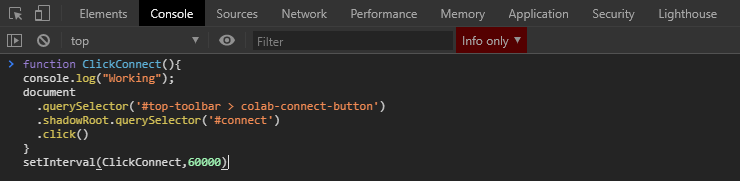

In [ ]:
# train your custom detector! (uncomment %%capture below if you run into memory issues or your Colab is crashing)
# %%capture
!./darknet detector train data/metal_data.data cfg/yolov4-custom-metal.cfg yolov4.conv.137 -dont_show -map

After training, you can observe a chart of how your model did throughout the training process by running the below command. It shows a chart of your average loss vs. iterations. For your model to be 'accurate' you should aim for a loss under 2.

In [ ]:
# show chart.png of how custom object detector did with training
imShow('chart.png')

Here is what the chart.png should look like after an uninterrupted training! If you stop training or it crashes during training your chart will look like the above one but don't worry you can still check accuracy of your model in the next steps.

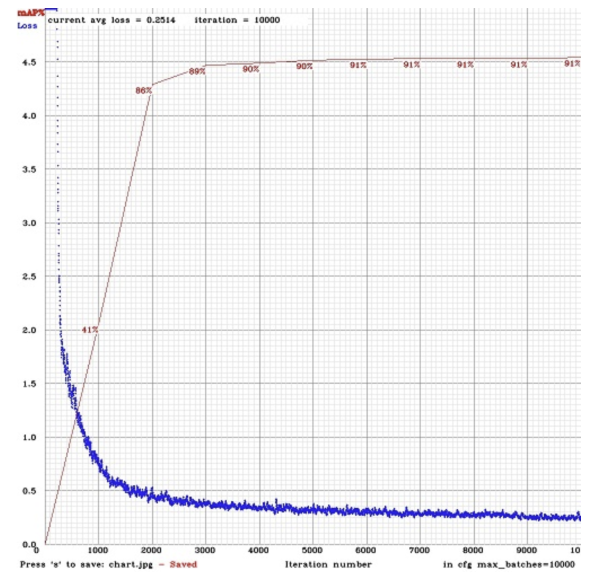

**TRICK**: If for some reason you get an error or your Colab goes idle during training, you have not lost your partially trained model and weights! Every 100 iterations a weights file called **yolov4-obj_last.weights** is saved to **mydrive/yolov4/backup/** folder (wherever your backup folder is). This is why we created this folder in our Google drive and not on the cloud VM. If your runtime crashes and your backup folder was in your cloud VM you would lose your weights and your training progress.

We can kick off training from our last saved weights file so that we don't have to restart! WOOHOO! Just run the following command but with your backup location.
```
!./darknet detector train data/obj.data cfg/yolov4-obj.cfg /mydrive/yolov4/backup/yolov4-obj_last.weights -dont_show
```

In [ ]:
# kick off training from where it last saved
# %%capture
!./darknet detector train data/metal_data.data cfg/yolov4-custom-metal.cfg  /content/drive/MyDrive/ColabData/yolov4-custom-metal_last.weights -dont_show -map


In [ ]:
# show chart.png of how custom object detector did with training
imShow('chart.png')

# Step 7: Checking the Mean Average Precision (mAP) of Your Model
If you didn't run the training with the '-map- flag added then you can still find out the mAP of your model after training. Run the following command on any of the saved weights from the training to see the mAP value for that specific weight's file. I would suggest to run it on multiple of the saved weights to compare and find the weights with the highest mAP as that is the most accurate one!

**NOTE:** If you think your final weights file has overfitted then it is important to run these mAP commands to see if one of the previously saved weights is a more accurate model for your classes.

In [21]:
!./darknet detector map data/metal_data.data cfg/yolov4-custom-metal.cfg  /content/drive/MyDrive/ColabData/yolov4-custom-metal_4000.weights

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 

# 25.12.2020
## yolov4-custom-metal_last.weights: 
```
20
 detections_count = 23, unique_truth_count = 16  
class_id = 0, name = scratch, ap = 70.83%   	 (TP = 5, FP = 0) 
class_id = 1, name = bent, ap = 50.89%   	 (TP = 5, FP = 4) 

 for conf_thresh = 0.25, precision = 0.71, recall = 0.62, F1-score = 0.67 
 for conf_thresh = 0.25, TP = 10, FP = 4, FN = 6, average IoU = 57.37 % 

 IoU threshold = 50 %, used Area-Under-Curve for each unique Recall 
 mean average precision (mAP@0.50) = 0.608631, or 60.86 % 
Total Detection Time: 1 Seconds
```

## yolov4-custom-metal_best.weights: 
```
20
 detections_count = 22, unique_truth_count = 16  
class_id = 0, name = scratch, ap = 80.62%   	 (TP = 5, FP = 0) 
class_id = 1, name = bent, ap = 48.21%   	 (TP = 5, FP = 3) 

 for conf_thresh = 0.25, precision = 0.77, recall = 0.62, F1-score = 0.69 
 for conf_thresh = 0.25, TP = 10, FP = 3, FN = 6, average IoU = 62.57 % 

 IoU threshold = 50 %, used Area-Under-Curve for each unique Recall 
 mean average precision (mAP@0.50) = 0.644196, or 64.42 % 
Total Detection Time: 1 Seconds
```

## yolov4-custom-metal_1000.weights: 
```
20
 detections_count = 60, unique_truth_count = 16  
class_id = 0, name = scratch, ap = 30.14%   	 (TP = 3, FP = 7) 
class_id = 1, name = bent, ap = 43.47%   	 (TP = 5, FP = 3) 

 for conf_thresh = 0.25, precision = 0.44, recall = 0.50, F1-score = 0.47 
 for conf_thresh = 0.25, TP = 8, FP = 10, FN = 8, average IoU = 32.02 % 

 IoU threshold = 50 %, used Area-Under-Curve for each unique Recall 
 mean average precision (mAP@0.50) = 0.368066, or 36.81 % 
Total Detection Time: 1 Seconds
```

## yolov4-custom-metal_2000.weights: 
```
20
 detections_count = 33, unique_truth_count = 16  
class_id = 0, name = scratch, ap = 74.18%   	 (TP = 5, FP = 1) 
class_id = 1, name = bent, ap = 52.13%   	 (TP = 5, FP = 4) 

 for conf_thresh = 0.25, precision = 0.67, recall = 0.62, F1-score = 0.65 
 for conf_thresh = 0.25, TP = 10, FP = 5, FN = 6, average IoU = 52.68 % 

 IoU threshold = 50 %, used Area-Under-Curve for each unique Recall 
 mean average precision (mAP@0.50) = 0.631550, or 63.15 % 
Total Detection Time: 1 Seconds
```

## yolov4-custom-metal_3000.weights: 
```
20
 detections_count = 24, unique_truth_count = 16  
class_id = 0, name = scratch, ap = 77.08%   	 (TP = 5, FP = 1) 
class_id = 1, name = bent, ap = 44.64%   	 (TP = 5, FP = 3) 

 for conf_thresh = 0.25, precision = 0.71, recall = 0.62, F1-score = 0.67 
 for conf_thresh = 0.25, TP = 10, FP = 4, FN = 6, average IoU = 57.71 % 

 IoU threshold = 50 %, used Area-Under-Curve for each unique Recall 
 mean average precision (mAP@0.50) = 0.608631, or 60.86 % 
Total Detection Time: 1 Seconds
```

## yolov4-custom-metal_4000.weights: 
```
20
 detections_count = 24, unique_truth_count = 16  
class_id = 0, name = scratch, ap = 78.79%   	 (TP = 5, FP = 0) 
class_id = 1, name = bent, ap = 44.64%   	 (TP = 5, FP = 4) 

 for conf_thresh = 0.25, precision = 0.71, recall = 0.62, F1-score = 0.67 
 for conf_thresh = 0.25, TP = 10, FP = 4, FN = 6, average IoU = 58.32 % 

 IoU threshold = 50 %, used Area-Under-Curve for each unique Recall 
 mean average precision (mAP@0.50) = 0.617154, or 61.72 % 
Total Detection Time: 1 Seconds
```


# Step 8: Run Your Custom Object Detector!!!
You now have a custom object detector to make your very own detections. Time to test it out and have some fun!

In [23]:
# need to set our custom cfg to test mode 
!sed -i 's/batch=64/batch=1/' cfg/yolov4-custom-metal.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' cfg/yolov4-custom-metal.cfg

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x

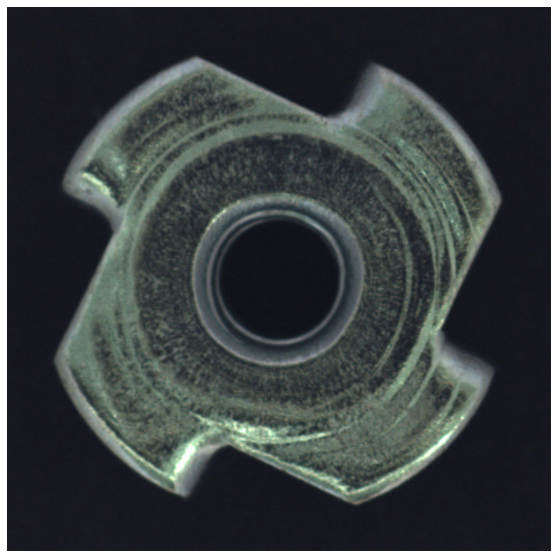

In [24]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test data/metal_data.data cfg/yolov4-custom-metal.cfg  /content/drive/MyDrive/ColabData/yolov4-custom-metal_4000.weights data/metal_yolo/good-000.png -thresh 0.3
imShow('predictions.jpg')

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x

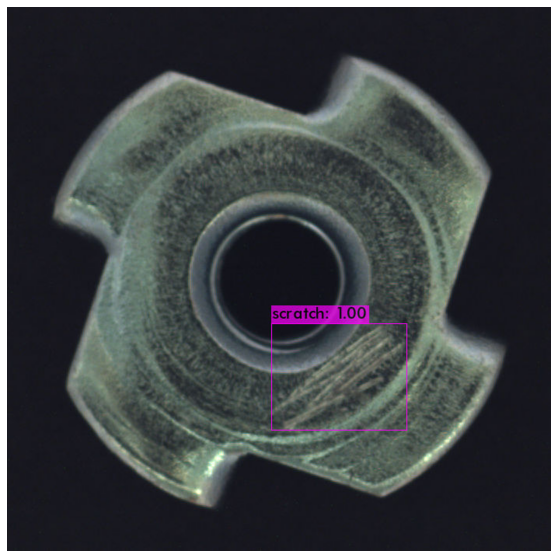

In [26]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test data/metal_data.data cfg/yolov4-custom-metal.cfg  /content/drive/MyDrive/ColabData/yolov4-custom-metal_4000.weights data/metal_yolo/scratch-000.png -thresh 0.3
imShow('predictions.jpg')

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x

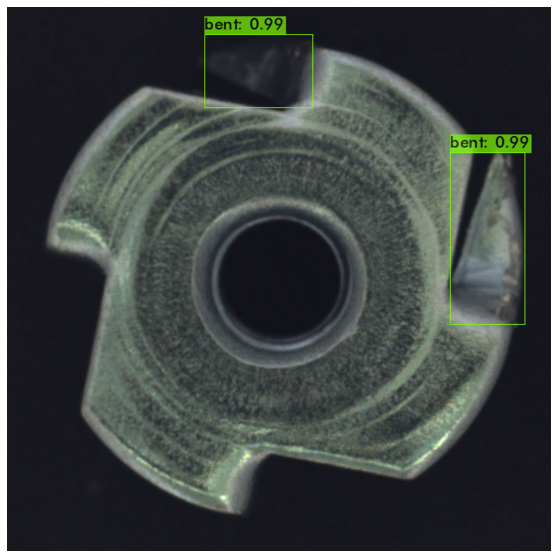

In [27]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test data/metal_data.data cfg/yolov4-custom-metal.cfg  /content/drive/MyDrive/ColabData/yolov4-custom-metal_4000.weights data/metal_yolo/bent-000.png -thresh 0.3
imShow('predictions.jpg')